<a href="https://colab.research.google.com/github/xsnia/cat-dog-classifier/blob/main/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow version:", tf.__version__)
print("GPU доступен:", tf.config.list_physical_devices('GPU') is not None)

TensorFlow version: 2.19.0
GPU доступен: True


In [9]:
dataset = tfds.load('cats_vs_dogs', split='train', as_supervised=True)

def preprocess(image, label):
    image = tf.image.resize(image, (160, 160))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

dataset = dataset.map(preprocess)

dataset_size = 23262
train_size = int(0.8 * dataset_size)

train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

BATCH_SIZE = 32
train_batches = train_dataset.batch(BATCH_SIZE).prefetch(1)
val_batches = val_dataset.batch(BATCH_SIZE).prefetch(1)

print(f"Тренировочных батчей: {len(list(train_batches))}")
print(f"Валидационных батчей: {len(list(val_batches))}")

Тренировочных батчей: 582
Валидационных батчей: 146


In [10]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(160, 160, 3)
)

base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(2, activation='softmax')
])

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
history = model.fit(
    train_batches,
    validation_data=val_batches,
    epochs=5
)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 548s 932ms/step - accuracy: 0.9416 - loss: 0.1351 - val_accuracy: 0.9772 - val_loss: 0.0627
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 506s 870ms/step - accuracy: 0.9781 - loss: 0.0644 - val_accuracy: 0.9761 - val_loss: 0.0643
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 503s 865ms/step - accuracy: 0.9788 - loss: 0.0581 - val_accuracy: 0.9789 - val_loss: 0.0600
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 491s 844ms/step - accuracy: 0.9804 - loss: 0.0562 - val_accuracy: 0.9789 - val_loss: 0.0590
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 488s 839ms/step - accuracy: 0.9815 - loss: 0.0554 - val_accuracy: 0.9787 - val_loss: 0.0594


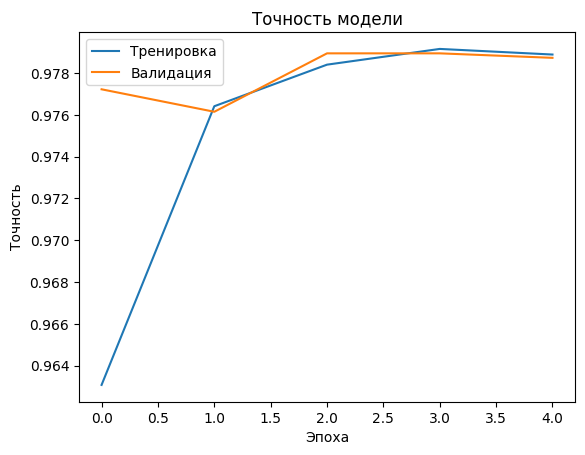

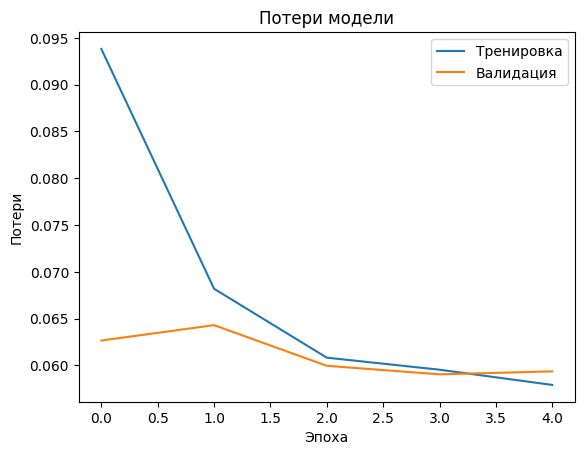

In [13]:
# График точности
plt.plot(history.history['accuracy'], label='Тренировка')
plt.plot(history.history['val_accuracy'], label='Валидация')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()

# График потерь
plt.plot(history.history['loss'], label='Тренировка')
plt.plot(history.history['val_loss'], label='Валидация')
plt.title('Потери модели')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

In [14]:
from google.colab import files
from PIL import Image

uploaded = files.upload()

for filename in uploaded.keys():
    img = Image.open(filename)
    img = img.resize((160, 160))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)
    class_names = ['Кот 🐱', 'Собака 🐶']
    confidence = np.max(pred) * 100

    print(f"\nФайл: {filename}")
    print(f"Это: {class_names[np.argmax(pred)]}")
    print(f"Уверенность: {confidence:.1f}%")

Saving cat.avif to cat.avif
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Файл: cat.avif
Это: Кот 🐱
Уверенность: 100.0%
